# Web Scraping project

The aim of this *interactive essay* is  to present many functions Jupyter Notebook has to offer, with focus on web scraping using nltk package.

## Introduction
Jupyter Notebook is a web-based interactive computing platform. It can be used to write interactive essays. It can simultaneously contain lines of codes (and execute them) as well as lines of text written in Markdown language. It has easy to understand interface, and working with it is quite intuitive. An example of code below:

In [3]:
print('Hello World!')  #simple command to show how code cells work

Hello World!


In this essay I will scrape the text from a webpage [scienceleadership.org](https://scienceleadership.org/blog/the_entire_bee_movie_script) which consists of the whole *Bee Movie* script in a text form.

## Collecting the data
Just as it would be in a Python project, all the imports were put in one code bar to ensure clarity for the reader.

In [102]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13cro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13cro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\13cro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

The variable *page* was defined and assigned with the content of the designated website. The comment below shows how we could possibly view all the downloaded content, but it is not necessary for the purpose of this research and shall be omitted.

In [103]:
page = requests.get("https://scienceleadership.org/blog/the_entire_bee_movie_script")
#print(page.content)

A new variable *soup* was defined using the [Beautiful Soup library](https://en.wikipedia.org/wiki/Beautiful_Soup_(HTML_parser)), which is a Python package made for parsing HTML and XML documents. The *prettify* method could be used to print out the HTML content, however it is not easily readable for the human eye and too long to be visually presented in this project.

In [131]:
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

## Cleaning the data
By using a build-in function with the parameter *p* we break the sentences into separate paragraphs.

In [136]:
paragraphs = soup.find_all('p')
print(paragraphs[0])

<p>Bee Movie Script
  
  
According to all known laws
of aviation,

  
there is no way a bee
should be able to fly.

  
Its wings are too small to get
its fat little body off the ground.

  
The bee, of course, flies anyway

  
because bees don't care
what humans think is impossible.

  
Yellow, black. Yellow, black.
Yellow, black. Yellow, black.

  
Ooh, black and yellow!
Let's shake it up a little.

  
Barry! Breakfast is ready!

  
Ooming!

  
Hang on a second.

  
Hello?

  
- Barry?
- Adam?

  
- Oan you believe this is happening?
- I can't. I'll pick you up.

  
Looking sharp.

  
Use the stairs. Your father
paid good money for those.

  
Sorry. I'm excited.

  
Here's the graduate.
We're very proud of you, son.

  
A perfect report card, all B's.

  
Very proud.

  
Ma! I got a thing going here.

  
- You got lint on your fuzz.
- Ow! That's me!

  
- Wave to us! We'll be in row 118,000.
- Bye!

  
Barry, I told you,
stop flying in the house!

  
- Hey, Adam.
- Hey, Barry.

  
- 

These separated paragraphs were further automatically cleaned by removing unecessary whitespace and punctuation by the means of a regular expression.

In [106]:
only_text = []
for para in paragraphs:
    text = para.get_text()
    text = re.sub('[^A-Za-z0-9 ]+', ' ', text).strip()

    if len(text) > 1:
        only_text.append(text)

print(only_text[0])

Bee Movie Script       According to all known laws of aviation    there is no way a bee should be able to fly    Its wings are too small to get its fat little body off the ground    The bee  of course  flies anyway    because bees don t care what humans think is impossible    Yellow  black  Yellow  black Yellow  black  Yellow  black    Ooh  black and yellow Let s shake it up a little    Barry  Breakfast is ready    Ooming    Hang on a second    Hello     Barry  Adam     Oan you believe this is happening  I can t  I ll pick you up    Looking sharp    Use the stairs  Your father paid good money for those    Sorry  I m excited    Here s the graduate We re very proud of you  son    A perfect report card  all B s    Very proud    Ma  I got a thing going here     You got lint on your fuzz  Ow  That s me     Wave to us  We ll be in row 118 000  Bye    Barry  I told you stop flying in the house     Hey  Adam  Hey  Barry     Is that fuzz gel  A little  Special day  graduation    Never thought I

## Data processing
Next step is the actual data processing. The sentences were tokenized - divided into singular items by using the NLTK package. As presented, each tuple contains the separated word (token) and its automatically assigned part-of-speech tag.
The list of the labels can be found [here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/).

In [138]:
tuples = []
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tuples.append(item)
print(tuples[:30])

[('Bee', 'NNP'), ('Movie', 'NNP'), ('Script', 'NNP'), ('According', 'VBG'), ('to', 'TO'), ('all', 'DT'), ('known', 'VBN'), ('laws', 'NNS'), ('of', 'IN'), ('aviation', 'NN'), ('there', 'EX'), ('is', 'VBZ'), ('no', 'DT'), ('way', 'NN'), ('a', 'DT'), ('bee', 'NN'), ('should', 'MD'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('fly', 'VB'), ('Its', 'PRP$'), ('wings', 'NNS'), ('are', 'VBP'), ('too', 'RB'), ('small', 'JJ'), ('to', 'TO'), ('get', 'VB'), ('its', 'PRP$'), ('fat', 'JJ')]


A Python dictionary was created to count the occurrence of each POS tag. Each tag was treated as a key, and repeating keys were summed up and printed below the code bar.

In [108]:
count_dict = {}
for item in tuples:
    if item[1] not in count_dict:
        count_dict[item[1]] = 1
    else:
        count_dict[item[1]] += 1

for item in count_dict:
    print(f"{item}: {count_dict[item]}")

NNP: 974
VBG: 244
TO: 203
DT: 842
VBN: 91
NNS: 328
IN: 750
NN: 1279
EX: 32
VBZ: 333
MD: 120
VB: 450
JJ: 586
PRP$: 179
VBP: 776
RB: 490
WP: 123
CC: 156
PRP: 1278
RP: 72
VBD: 294
CD: 75
PDT: 15
WRB: 71
WDT: 38
NNPS: 5
UH: 5
JJS: 10
RBS: 1
JJR: 30
RBR: 9
POS: 2
FW: 1
WP$: 1


The newly created dictionary was visualized using [matplotlib](https://matplotlib.org/stable/index.html) package. For this particular example it was displayed using a column chart.

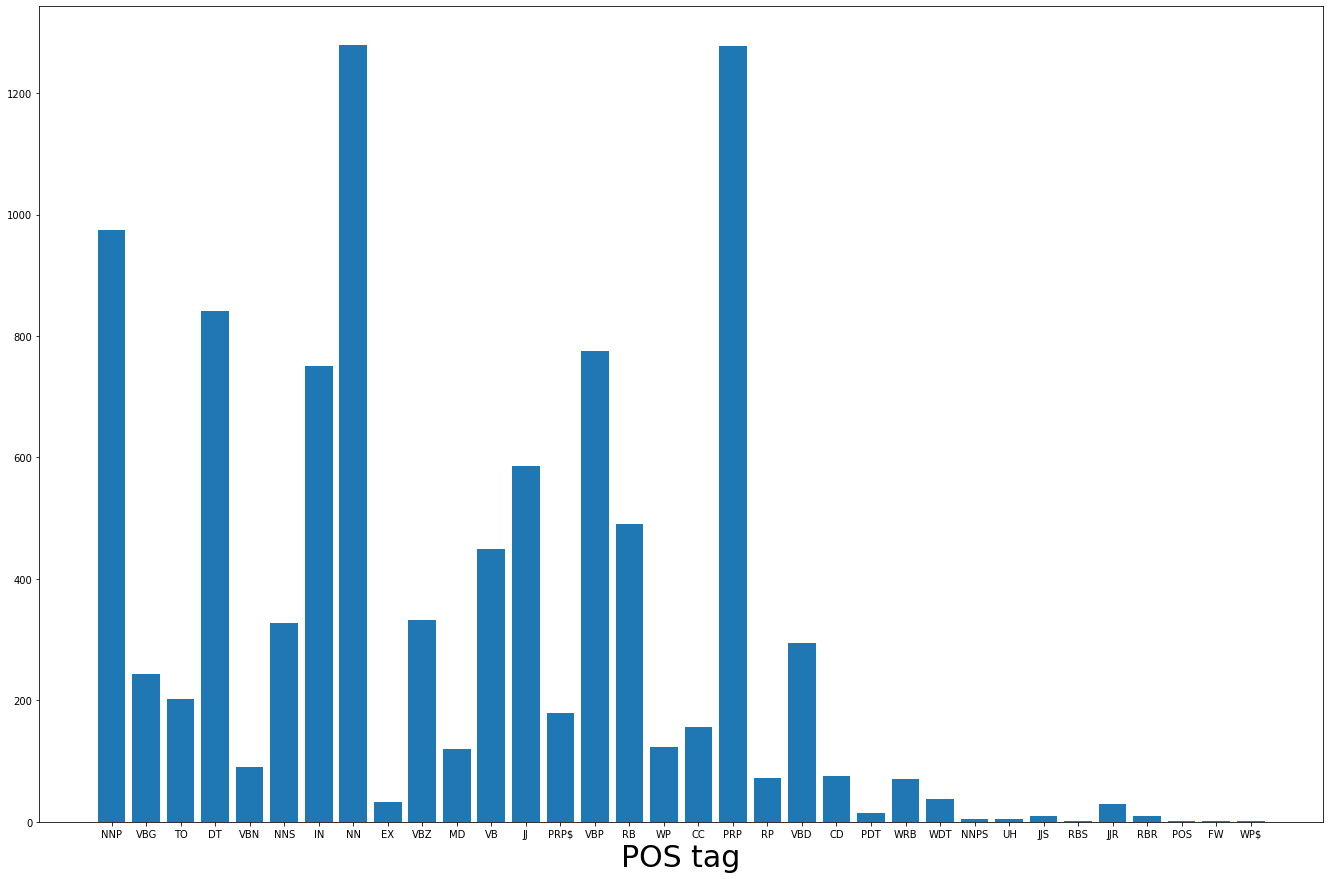

In [109]:
names = list(count_dict.keys())
values = list(count_dict.values())

plt.figure(figsize=(23,15))
plt.bar(range(len(count_dict)), values, tick_label=names)
plt.xlabel('POS tag', size=30)
plt.show()

Based on the graph, the most commonly occurring words are NN (noun, singular) and interestingly PRP (Personal Pronouns 'I, he she'), however it is not as surprising when it is recognized that the *Bee Movie* was mostly the inner monologue of the main protagonist.

Another thing that could be done using the nltk package would be showing the frequency of words in the list of tagged tokens, which was established earlier in this essay.

In [127]:
fr = nltk.FreqDist(tuples)
print(fr.most_common(20))

[(('I', 'PRP'), 349), (('a', 'DT'), 242), (('the', 'DT'), 232), (('you', 'PRP'), 209), (('to', 'TO'), 187), (('it', 'PRP'), 172), (('of', 'IN'), 131), (('You', 'PRP'), 119), (('is', 'VBZ'), 104), (('s', 'VBZ'), 103), (('in', 'IN'), 85), (('re', 'VBP'), 84), (('this', 'DT'), 83), (('m', 'VBP'), 76), (('we', 'PRP'), 76), (('and', 'CC'), 74), (('on', 'IN'), 70), (('It', 'PRP'), 67), (('your', 'PRP$'), 66), (('What', 'WP'), 63)]


A specific number of most frequent tokens could be presented in a form of a cumulative frequency graph for clear visual representation.

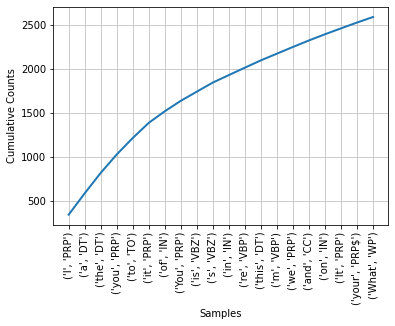

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [129]:
fr.plot(20, cumulative=True)

## Conclusion
This interactive Web Scraping Project demonstrates possible uses of the [Natural Language Toolkit](https://www.nltk.org), and how it could help with linguistic analysis of large quantity of data in a rather short span of time. This project is only a snippet of the actual capability of this toolkit, many more steps could be performed to get a cleaner and more proper data which could be further analysed using much more complex methods.